# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Collection

In [2]:
df=pd.read_csv("ai_financial_market_daily_realistic_synthetic.csv")

# Data Cleaning

In [3]:
df.head()

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10959 entries, 0 to 10958
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 10959 non-null  object 
 1   Company              10959 non-null  object 
 2   R&D_Spending_USD_Mn  10959 non-null  float64
 3   AI_Revenue_USD_Mn    10959 non-null  float64
 4   AI_Revenue_Growth_%  10959 non-null  float64
 5   Event                233 non-null    object 
 6   Stock_Impact_%       10959 non-null  float64
dtypes: float64(4), object(3)
memory usage: 599.4+ KB


In [6]:
df.shape

(10959, 7)

In [8]:
df.isnull().sum()

Date                       0
Company                    0
R&D_Spending_USD_Mn        0
AI_Revenue_USD_Mn          0
AI_Revenue_Growth_%        0
Event                  10726
Stock_Impact_%             0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df['Date']=pd.to_datetime(df['Date'])

# Exploratory Data Analysis (EDA)

In [7]:
df.describe()

,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Stock_Impact_%
count,10959.000000,10959.000000,10959.000000,10959.000000
mean,65.184504,44.126571,159.395988,0.025560
std,47.918247,41.639356,135.462185,0.749513
min,1.570000,-0.550000,-155.430000,-3.000000
25%,8.640000,3.610000,43.870000,-0.500000
50%,70.960000,35.220000,133.750000,0.000000
75%,99.600000,71.680000,258.300000,0.510000
max,163.830000,155.960000,565.500000,18.500000


In [12]:
df['Year']=df['Date'].dt.year

In [13]:
df.head()

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36,2015
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41,2015
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23,2015
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93,2015
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09,2015


In [11]:
df['Company'].unique()

array(['OpenAI', 'Google', 'Meta'], dtype=object)

In [14]:
df['Year'].unique()

array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
      dtype=int32)

# R&D Spending By Company Analysis

In [16]:
R_AND_D=df.groupby('Company')['R&D_Spending_USD_Mn'].sum()/1000
R_AND_D

Company
Google    423.34114
Meta      264.53307
OpenAI     26.48277
Name: R&D_Spending_USD_Mn, dtype: float64

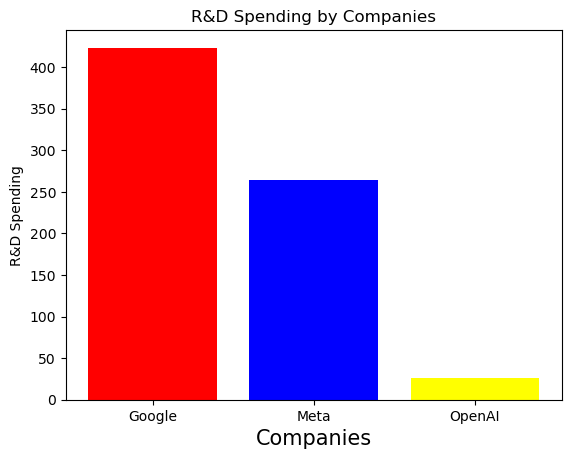

In [17]:
plt.bar(R_AND_D.index,R_AND_D.values, color=['Red','Blue','Yellow'])
plt.xlabel("Companies",fontsize=15)
plt.ylabel("R&D Spending")
plt.title("R&D Spending by Companies")
plt.show()

# Revenue Earned By Companies Analysis

In [18]:
Revenue_Earned=df.groupby('Company')['AI_Revenue_USD_Mn'].sum()/1000
Revenue_Earned

Company
Google    284.49838
Meta      189.62182
OpenAI      9.46289
Name: AI_Revenue_USD_Mn, dtype: float64

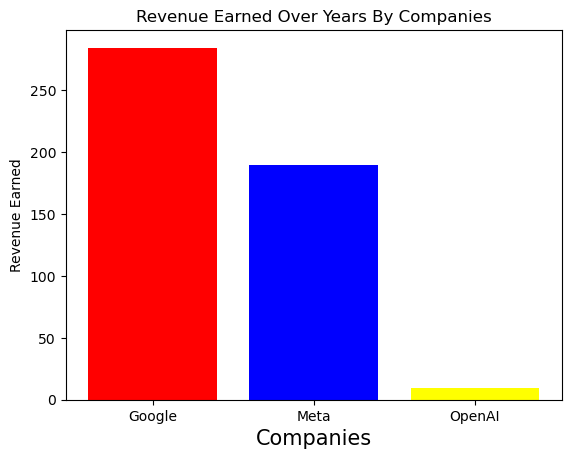

In [19]:
plt.bar(Revenue_Earned.index,Revenue_Earned.values, color=['red','blue','yellow'])
plt.title("Revenue Earned Over Years By Companies")
plt.xlabel("Companies",fontsize=15)
plt.ylabel("Revenue Earned")
plt.show()

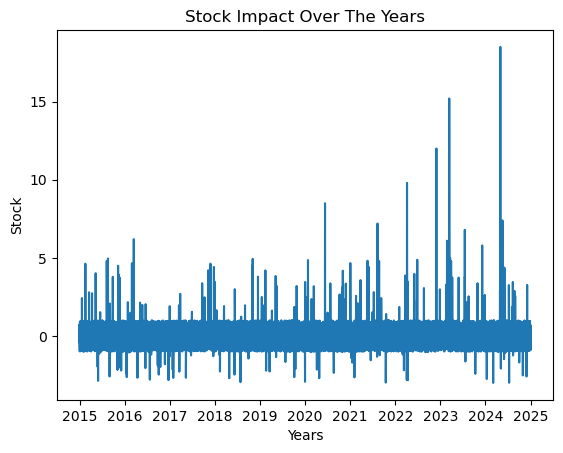

In [20]:
plt.plot(df['Date'],df['Stock_Impact_%'])
plt.title("Stock Impact Over The Years")
plt.xlabel("Years")
plt.ylabel("Stock")
plt.show()

In [21]:
Open_AI=df[df['Company']=="OpenAI"]
Google=df[df['Company']=="Google"]
Meta=df[df['Company']=="Meta"]

# Stock Impact Analysis

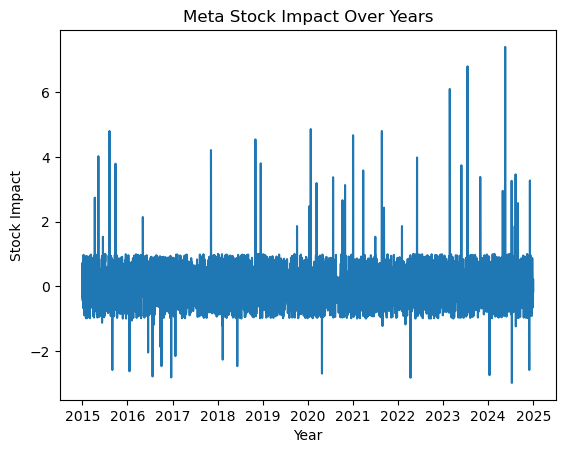

In [22]:
plt.plot(Meta['Date'],Meta['Stock_Impact_%'])
plt.title("Meta Stock Impact Over Years")
plt.xlabel("Year")
plt.ylabel("Stock Impact")
plt.show()

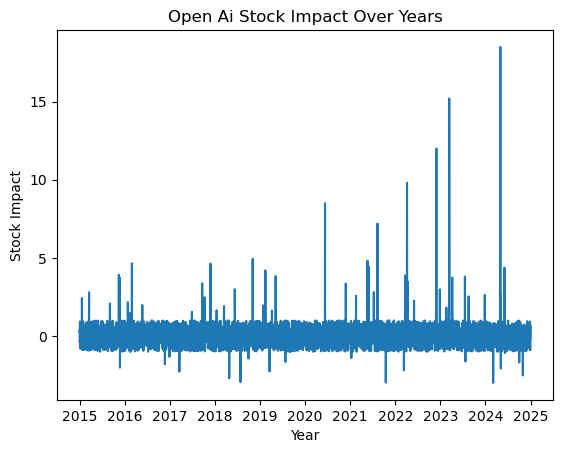

In [23]:
plt.plot(Open_AI['Date'],Open_AI['Stock_Impact_%'])
plt.title("Open Ai Stock Impact Over Years")
plt.xlabel("Year")
plt.ylabel("Stock Impact")
plt.show()

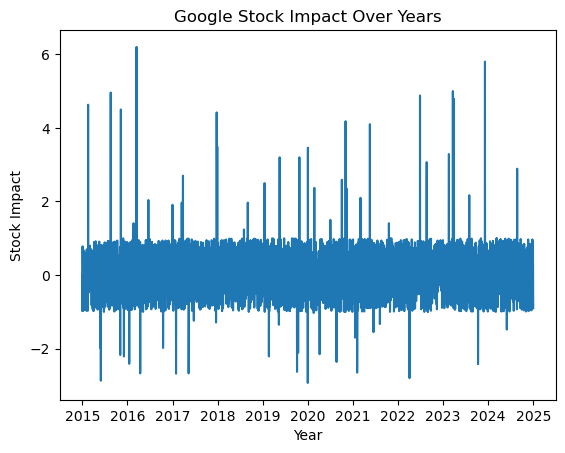

In [24]:
plt.plot(Google['Date'],Google['Stock_Impact_%'])
plt.title("Google Stock Impact Over Years")
plt.xlabel("Year")
plt.ylabel("Stock Impact")
plt.show()

# Events With Highest Stock Impact

In [27]:
max_stock_impact_google=Google.loc[Google['Stock_Impact_%'].idxmax()]
print("Google Max Stock Impact = ",max_stock_impact_google['Stock_Impact_%'])
print("Event of Max Stock Impact = ",max_stock_impact_google['Event'])
print("")
max_stock_impact_meta=Meta.loc[Meta['Stock_Impact_%'].idxmax()]
print("Meta Max Stock Impact = ",max_stock_impact_meta["Stock_Impact_%"])
print("Event of Max Stock Impact = ",max_stock_impact_meta["Event"])
print("")
max_stock_impact_openai=Open_AI.loc[Open_AI['Stock_Impact_%'].idxmax()]
print("Open Ai Max Stock Impact = ",max_stock_impact_openai["Stock_Impact_%"])
print("Event of Max Stock Impact = ",max_stock_impact_openai["Event"])

Google Max Stock Impact =  6.2
Event of Max Stock Impact =  AlphaGo beats Lee Sedol

Meta Max Stock Impact =  7.4
Event of Max Stock Impact =  LLaMA 3 release (predicted)

Open Ai Max Stock Impact =  18.5
Event of Max Stock Impact =  GPT-5 release (predicted)


# AI Revenue Growth Analysis

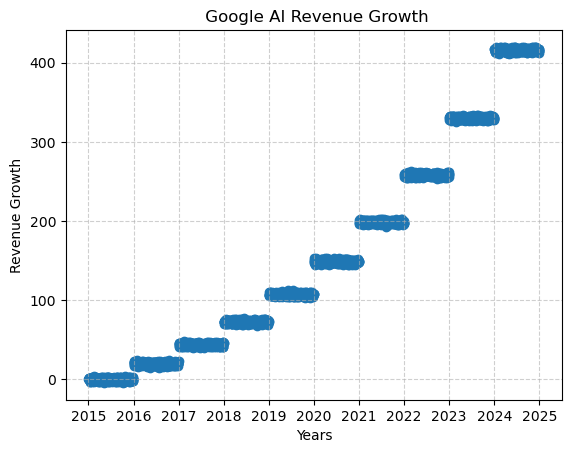

In [45]:
plt.scatter(Google['Date'],Google['AI_Revenue_Growth_%'])
plt.title(" Google AI Revenue Growth")
plt.xlabel("Years")
plt.ylabel("Revenue Growth")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

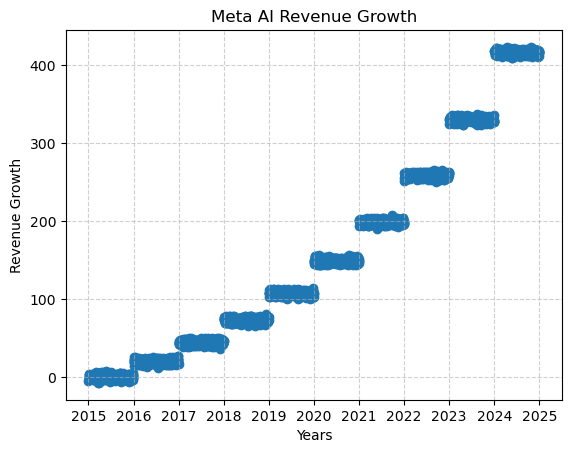

In [46]:
plt.scatter(Meta['Date'],Meta['AI_Revenue_Growth_%'])
plt.title("Meta AI Revenue Growth")
plt.xlabel("Years")
plt.ylabel("Revenue Growth")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

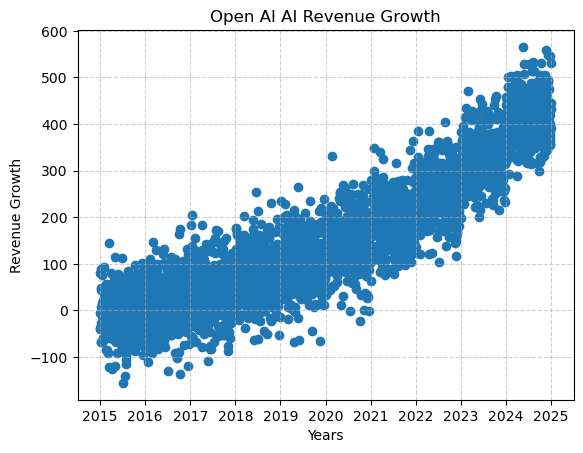

In [47]:
plt.scatter(Open_AI['Date'],Open_AI['AI_Revenue_Growth_%'])
plt.title("Open AI AI Revenue Growth")
plt.xlabel("Years")
plt.ylabel("Revenue Growth")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# R&D Spending & Revenue Difference Analysis

In [31]:
Revenue_Google=Google.groupby('Year')['AI_Revenue_USD_Mn'].sum()
Revenue_Google

Year
2015    10962.63
2016    13156.27
2017    15756.37
2018    18924.12
2019    22701.64
2020    27328.95
2021    32705.27
2022    39228.04
2023    47088.80
2024    56646.29
Name: AI_Revenue_USD_Mn, dtype: float64

In [36]:
RD_Spend_Google=Google.groupby('Year')['R&D_Spending_USD_Mn'].sum()
RD_Spend_Google

Year
2015    29189.88
2016    31643.54
2017    34069.58
2018    36793.71
2019    39719.53
2020    43016.73
2021    46334.04
2022    50009.88
2023    54037.28
2024    58526.97
Name: R&D_Spending_USD_Mn, dtype: float64

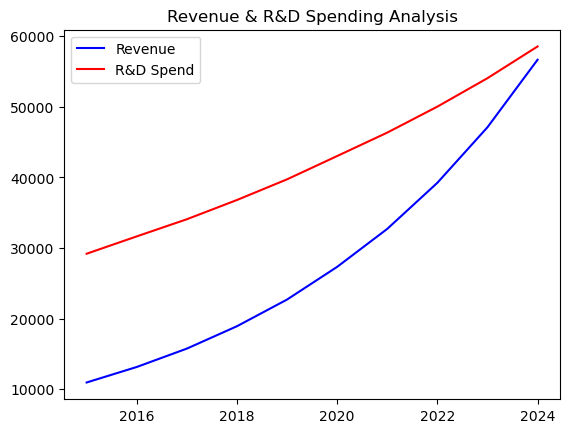

In [37]:
plt.plot(Revenue_Google.index,Revenue_Google.values, color='blue')
plt.plot(RD_Spend_Google.index,RD_Spend_Google.values, color='red')
plt.legend(['Revenue','R&D Spend'])
plt.title("Revenue & R&D Spending Analysis")
plt.show()

In [38]:
Revenue_Meta=Meta.groupby('Year')['AI_Revenue_USD_Mn'].sum()
Revenue_Meta

Year
2015     7304.13
2016     8768.17
2017    10501.44
2018    12596.20
2019    15127.71
2020    18214.22
2021    21794.18
2022    26151.89
2023    31385.74
2024    37778.14
Name: AI_Revenue_USD_Mn, dtype: float64

In [39]:
RD_Spend_Meta=Meta.groupby('Year')['R&D_Spending_USD_Mn'].sum()
RD_Spend_Meta

Year
2015    18248.09
2016    19763.85
2017    21260.37
2018    22947.79
2019    24861.99
2020    26884.91
2021    28948.55
2022    31273.90
2023    33777.24
2024    36566.38
Name: R&D_Spending_USD_Mn, dtype: float64

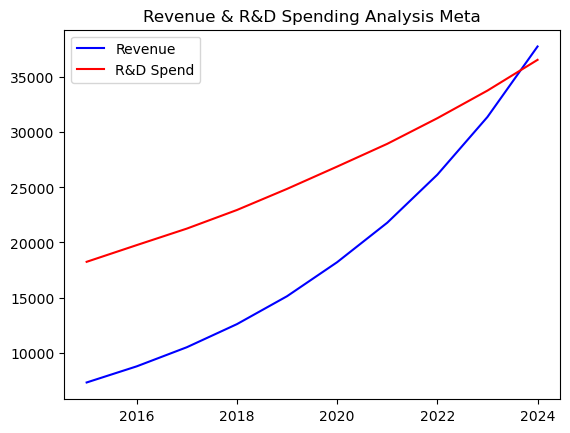

In [40]:
plt.plot(Revenue_Meta.index,Revenue_Meta.values, color='blue')
plt.plot(RD_Spend_Meta.index,RD_Spend_Meta.values, color='red')
plt.legend(['Revenue','R&D Spend'])
plt.title("Revenue & R&D Spending Analysis Meta")
plt.show()

In [41]:
Revenue_OpenAi=Open_AI.groupby('Year')['AI_Revenue_USD_Mn'].sum()
Revenue_OpenAi

Year
2015     356.45
2016     436.76
2017     518.99
2018     644.12
2019     750.97
2020     913.02
2021    1091.69
2022    1294.31
2023    1567.10
2024    1889.48
Name: AI_Revenue_USD_Mn, dtype: float64

In [42]:
RD_Spend_OpenAi=Open_AI.groupby('Year')['R&D_Spending_USD_Mn'].sum()
RD_Spend_OpenAi

Year
2015    1866.26
2016    1942.55
2017    2145.17
2018    2260.66
2019    2489.99
2020    2700.89
2021    2924.73
2022    3106.39
2023    3379.40
2024    3666.73
Name: R&D_Spending_USD_Mn, dtype: float64

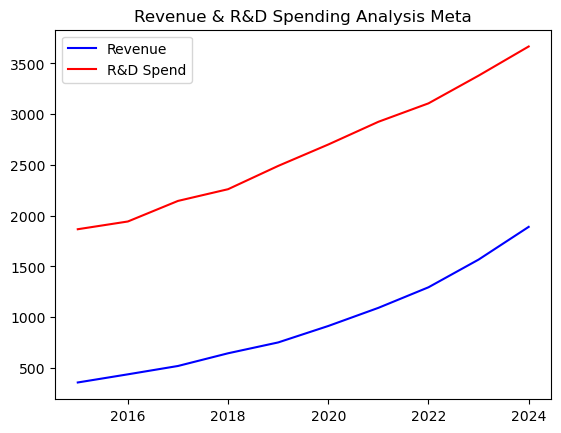

In [43]:
plt.plot(Revenue_OpenAi.index,Revenue_OpenAi.values, color='blue')
plt.plot(RD_Spend_OpenAi.index,RD_Spend_OpenAi.values, color='red')
plt.legend(['Revenue','R&D Spend'])
plt.title("Revenue & R&D Spending Analysis Meta")
plt.show()

# Correlation Between Columns

In [44]:
df[['R&D_Spending_USD_Mn', 'AI_Revenue_USD_Mn', 'AI_Revenue_Growth_%', 'Stock_Impact_%']].corr()

,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Stock_Impact_%
R&D_Spending_USD_Mn,1.000000,0.935030,0.291245,-0.004628
AI_Revenue_USD_Mn,0.935030,1.000000,0.530128,-0.000017
AI_Revenue_Growth_%,0.291245,0.530128,1.000000,0.020937
Stock_Impact_%,-0.004628,-0.000017,0.020937,1.000000
